In [125]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.power as smp

# **4.1 Reliability: System lifetime (simulation as a computation tool)**

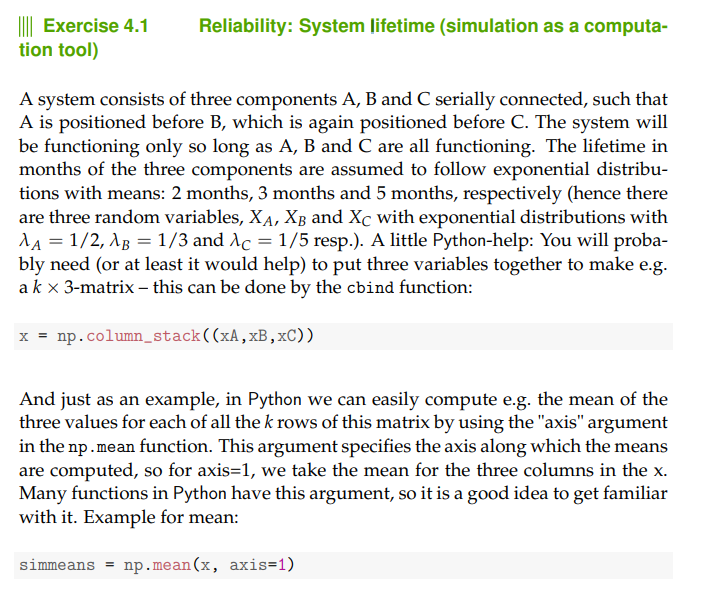

### **a)** Generate, by simulation, a large number (at least 1000 – go for 10000 or 100000 if your computer is up for it) of system lifetimes (hint: consider how the random variable Y = System lifetime is a function of the three X-variables: is it the sum, the mean, the median, the minimum, the maximum, the range or something even different?).

---

The life time is the same as **the minimum value of the three random components lifetime**:

Lifetime = min($X_A, X_b, X_c$)

In [126]:
np.random.seed(82719)

# Number of simulations
k = 10000



# Generating k component A lifetimes
xA = np.random.exponential(scale=2, size=k)
# Checking the mean of these
print(np.mean(xA))



# Generating k component B lifetimes
xB = np.random.exponential(scale=3, size=k)
# Checking the mean of these
print(np.mean(xB))



# Generating k component C lifetimes
xC = np.random.exponential(scale=5, size=k)
# Checking the mean of these
print(np.mean(xC))



# Putting these three sets of k lifetimes together
# into a single k-by-3 matrix
x = np.column_stack((xA, xB, xC))
print(x)


# Finding the minimum value of the three components in each of the k situations
lifetimes = np.min(x, axis=1)
print(lifetimes)



2.0035078916253752
3.0264519724715777
5.047803906911606
[[ 0.32096009  4.89521004 11.17970339]
 [ 0.49104349  3.00679469  4.38692924]
 [ 1.60882559  1.48508379  0.92943733]
 ...
 [ 1.27365925  9.39535503  5.08295013]
 [ 4.61581728  1.14233536  9.28158813]
 [ 3.24880436  0.0159197   0.07180933]]
[0.32096009 0.49104349 0.92943733 ... 1.27365925 1.14233536 0.0159197 ]


We can plot these simulated lifetimes:

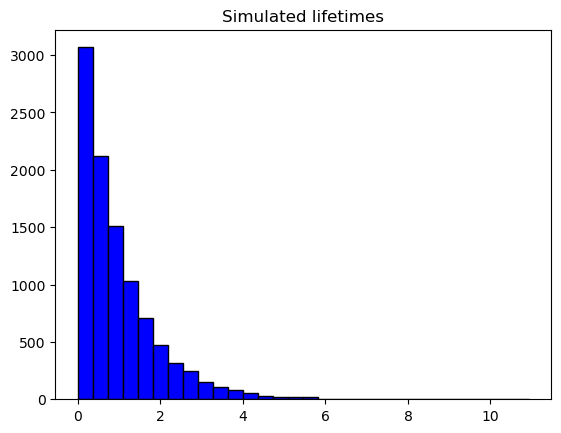

In [127]:
plt.hist(lifetimes, bins=30, color='blue', edgecolor='black')
plt.title('Simulated lifetimes')

plt.show()

### **b)** Estimate the mean system lifetime.
---

In [128]:
print(np.mean(lifetimes))

0.9880015386365172


### **c)** Estimate the standard deviation of system lifetimes.
---

In [129]:
print(np.std(lifetimes, ddof=1))

0.9959225338611547


### **d)** Estimate the probability that the system fails within 1 month.
---

In [130]:
print(np.mean(lifetimes <=1))

#or

print(np.sum(lifetimes <=1)/k)

#REMEMBER: In Python FALSE is a 0 and a TRUE is a 1 - this is why we can simply apply the mean
#function directly on the vector of TRUES and FALSES like this.


0.6391
0.6391


### **e)** Estimate the median system lifetime
---

In [131]:
print(np.median(lifetimes))

0.6878542614451192


### **f)** Estimate the 10th percentile of system lifetimes
---

In [132]:
print(np.quantile(lifetimes, 0.10))

0.10367217182567331


### **g)** What seems to be the distribution of system lifetimes? (histogram etc)
---

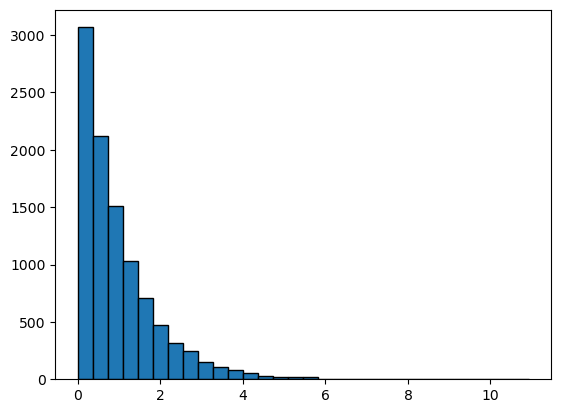

In [133]:
plt.hist(lifetimes, bins = 30, edgecolor = 'black')
plt.show()

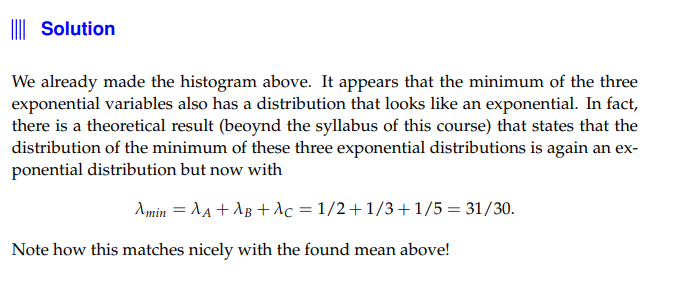

---

# **4.2 Basic bootstrap CI**

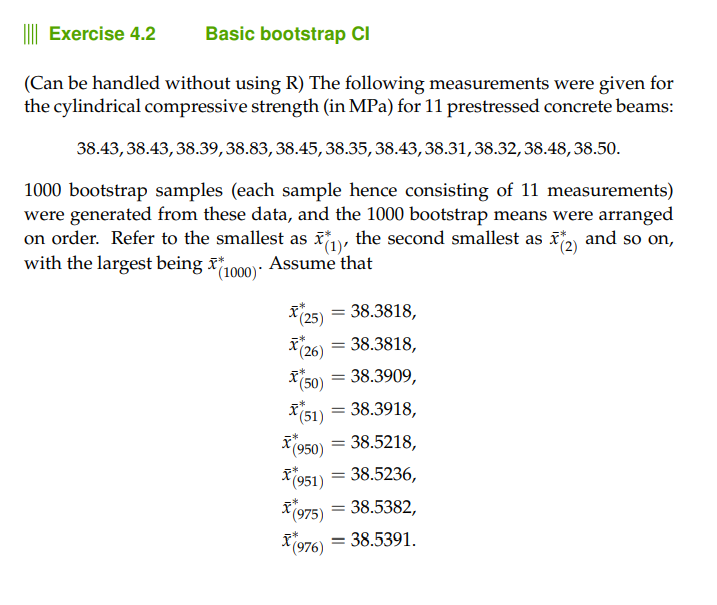

### **a)** Compute a 95% bootstrap confidence interval for the mean compressive strength.
---

* ##### The task asks for a 95% bootstrap confidence interval for the mean compressive strength of prestressed concrete beams.

* ##### Bootstrap sampling involves generating resamples (with replacement) from the original data and calculating the mean for each of these resamples.

* ##### After obtaining the bootstrap distribution of means, you calculate the confidence interval by selecting the 2.5th and 97.5th percentiles (for a 95% CI).

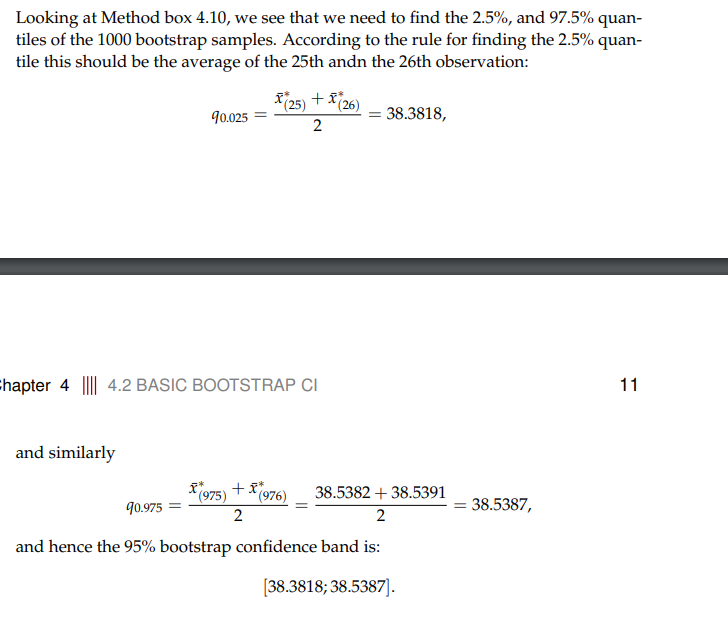

In [134]:
strengths = np.array([38.43, 38.43, 38.39, 38.83, 38.45, 38.35, 38.43, 38.31, 38.32, 38.48, 38.50])

k = 10000

bootstrap_means = [np.mean(np.random.choice(strengths, size=len(strengths), replace=True)) for _ in range(k)]


CI = [np.percentile(bootstrap_means, [2.5, 97.5])]

print(CI)



# OR: this is more correct, teachers answer

x = np.array([38.43, 38.43, 38.39, 38.83, 38.45, 38.35,
38.43, 38.31, 38.32, 38.48, 38.50])
k = 10000
n = len(x)
simsamples = np.random.choice(x, (n, k), replace=True)
simmeans = np.mean(simsamples, axis=0)
print(np.quantile(simmeans, [0.025, 0.975]))



[array([38.38272727, 38.53636364])]
[38.38181818 38.53363636]


### **b)** Compute a 90% bootstrap confidence interval for the mean compressive strength.
---

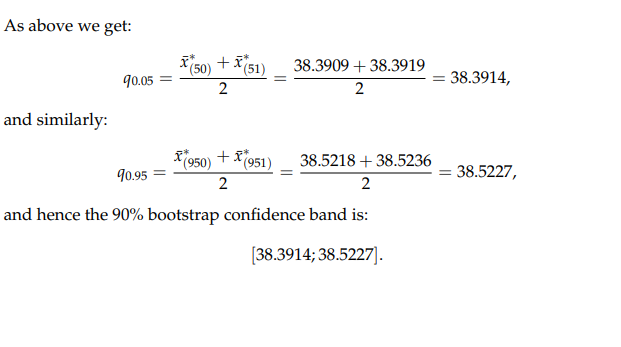

In [135]:
strengths = np.array([38.43, 38.43, 38.39, 38.83, 38.45, 38.35, 38.43, 38.31, 38.32, 38.48, 38.50])

k = 10000

bootstrap_means = [np.mean(np.random.choice(strengths, size=len(strengths), replace=True)) for _ in range(k)]
print(bootstrap_means)

CI = [np.percentile(bootstrap_means, [5, 95])]

print(CI)

[38.41181818181818, 38.439090909090915, 38.5, 38.39727272727272, 38.410909090909094, 38.449090909090906, 38.43, 38.43, 38.42272727272728, 38.482727272727274, 38.4209090909091, 38.42090909090909, 38.406363636363636, 38.36272727272728, 38.39181818181818, 38.446363636363635, 38.442727272727275, 38.483636363636364, 38.45909090909091, 38.42636363636364, 38.45363636363636, 38.51909090909091, 38.46727272727273, 38.51909090909091, 38.39545454545455, 38.518181818181816, 38.582727272727276, 38.45818181818182, 38.50727272727273, 38.479090909090914, 38.5009090909091, 38.46727272727273, 38.410909090909094, 38.450909090909086, 38.413636363636364, 38.440000000000005, 38.47, 38.459090909090904, 38.43454545454546, 38.43454545454546, 38.53363636363636, 38.45818181818182, 38.49999999999999, 38.583636363636366, 38.54181818181817, 38.45727272727273, 38.446363636363635, 38.46000000000001, 38.42818181818182, 38.53727272727272, 38.57272727272727, 38.480000000000004, 38.50545454545455, 38.41090909090909, 38.40

---

# **Various bootstrap CIs**

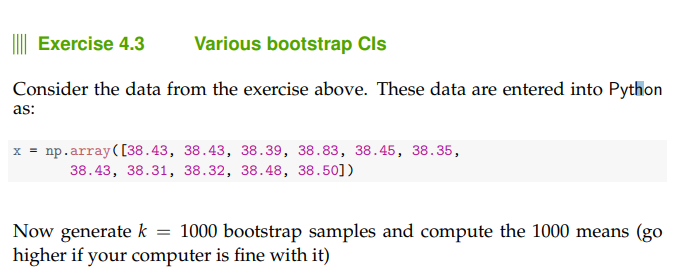

### **a)** What are the 2.5%, and 97.5% quantiles (so what is the 95% confidence interval for µ without assuming any distribution)?
---

In [136]:
#Like before:

strengths = np.array([38.43, 38.43, 38.39, 38.83, 38.45, 38.35, 38.43, 38.31, 38.32, 38.48, 38.50])

k = 10000

bootstrap_means = [np.mean(np.random.choice(strengths, size=len(strengths), replace=True)) for _ in range(k)]


CI = [np.percentile(bootstrap_means, [2.5, 97.5])]

print(CI)



# OR:

x = np.array([38.43, 38.43, 38.39, 38.83, 38.45, 38.35,
38.43, 38.31, 38.32, 38.48, 38.50])
k = 10000
n = len(x)
simsamples = np.random.choice(x, (n, k), replace=True)
simmeans = np.mean(simsamples, axis=0)
print(np.quantile(simmeans, [0.025, 0.975]))


[array([38.38272727, 38.53636364])]
[38.38181818 38.53545455]


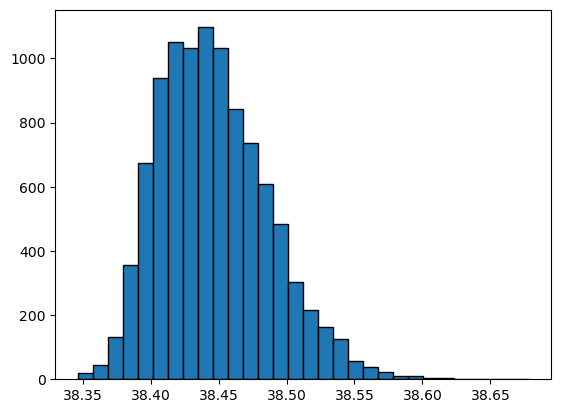

In [137]:
plt.hist(simmeans, bins=30, edgecolor="black")
plt.show()

### **b)** Find the 95% confidence interval for µ by the parametric bootstrap assuming the normal distribution for the observations. Compare with the classical analytic approach based on the t-distribution from Chapter 2.
---

In [138]:
x = np.array([38.43, 38.43, 38.39, 38.83, 38.45, 38.35,
38.43, 38.31, 38.32, 38.48, 38.50])
k = 10000
n = len(x)
simsamples = np.random.normal(np.mean(x), np.std(x, ddof=1), (n, k))
simmeans = np.mean(simsamples, axis=0)
print(np.quantile(simmeans, [0.025, 0.975]))


[38.36367197 38.53230402]


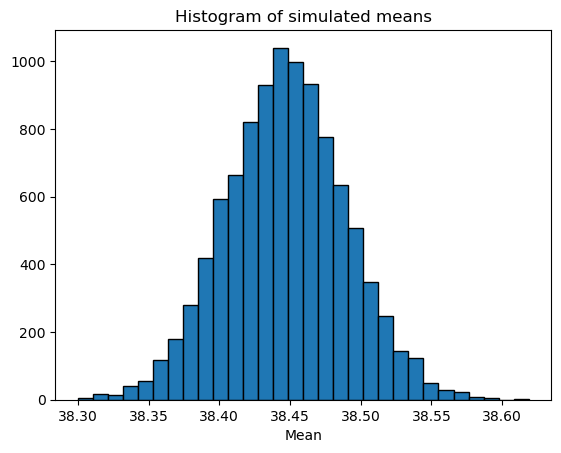

In [139]:
plt.hist(simmeans, bins=30, edgecolor = 'black')
plt.title('Histogram of simulated means')
plt.xlabel('Mean')
plt.show()

In [140]:
t_stat,p_val = stats.ttest_1samp(x, 38.5)
print(t_stat)

print(p_val)

# interval directly
(CI_low,CI_high) = stats.t.interval(0.95, len(x)-1, loc=np.mean(x),
scale=stats.sem(x))
print(CI_low,CI_high)


-1.239610578766898
0.24342150717016434
38.35249805615088 38.54204739839457


### **c)** Find the 95% confidence interval for µ by the parametric bootstrap assuming the log-normal distribution for the observations. (Help: To use the np.random.lognormal function to simulate the log-normal distribution, we face the challenge that we need to specify the mean and standard deviation on the log-scale and not on the raw scale, so compute mean and standard deviation for log-transformed data for this Python-function)
---

[38.36391334 38.52898704]


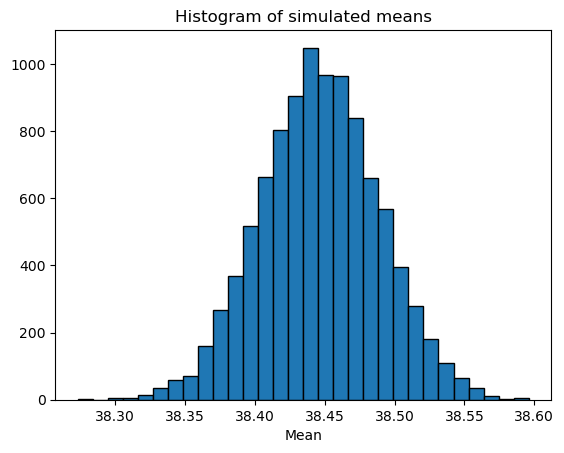

In [141]:
k = 10000
n = len(x)
simsamples = np.random.lognormal(np.mean(np.log(x)),
np.std(np.log(x),ddof=1), (n, k))

simmeans = np.mean(simsamples, axis=0)
print(np.quantile(simmeans, [0.025, 0.975]))

# Histogram
plt.hist(simmeans, bins=30, edgecolor = 'black')
plt.title('Histogram of simulated means')
plt.xlabel('Mean')
plt.show()


### **d)** Find the 95% confidence interval for the lower quartile Q1 by the parametric bootstrap assuming the normal distribution for the observations.
---

In [142]:
x = np.array([38.43, 38.43, 38.39, 38.83, 38.45, 38.35,
38.43, 38.31, 38.32, 38.48, 38.50])
k = 10000
n = len(x)
simsamples = np.random.normal(np.mean(x), np.std(x, ddof=1), (n, k))
simQ1s = np.quantile(simsamples, 0.25, axis=0)
print(np.quantile(simmeans, [0.025, 0.975]))



[38.36391334 38.52898704]


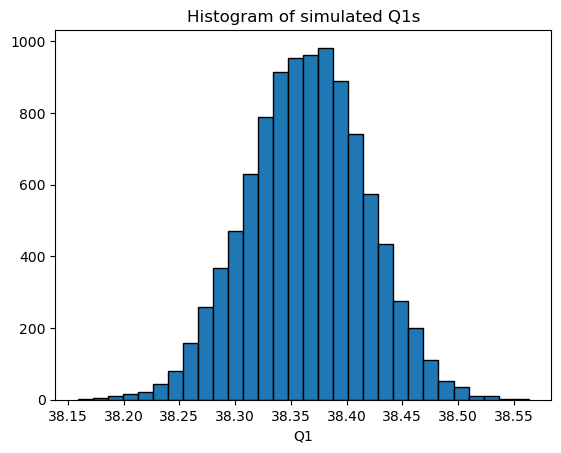

In [143]:
plt.hist(simQ1s, bins=30, edgecolor ='black')
plt.title('Histogram of simulated Q1s')
plt.xlabel('Q1')
plt.show()

### **e)** Find the 95% confidence interval for the lower quartile Q1 by the nonparametric bootstrap (so without any distributional assumptions)
---

In [144]:
k = 10000
n = len(x)
simsamples = np.random.choice(x, (n, k), replace=True)
simQ1s = np.quantile(simsamples, 0.25, axis=0)
print(np.quantile(simQ1s, [0.025, 0.975]))

[38.315 38.43 ]


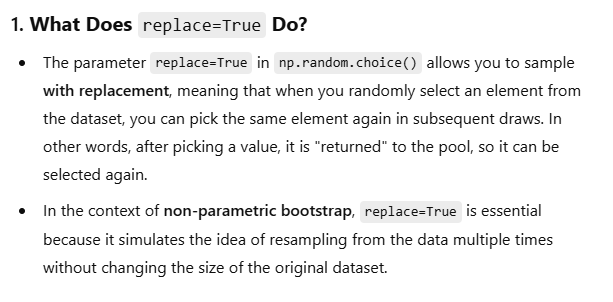

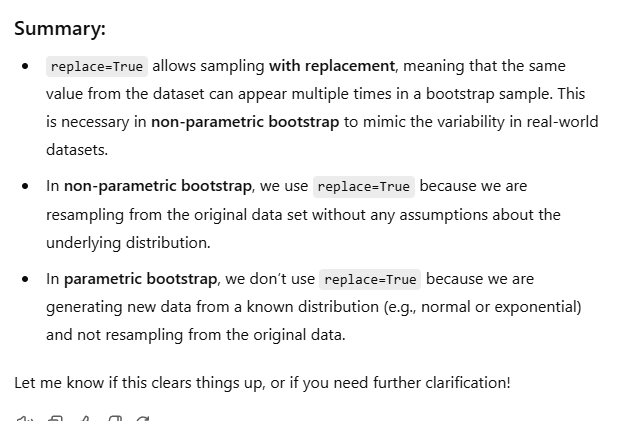

---

# **4.4 Two-sample TV data**

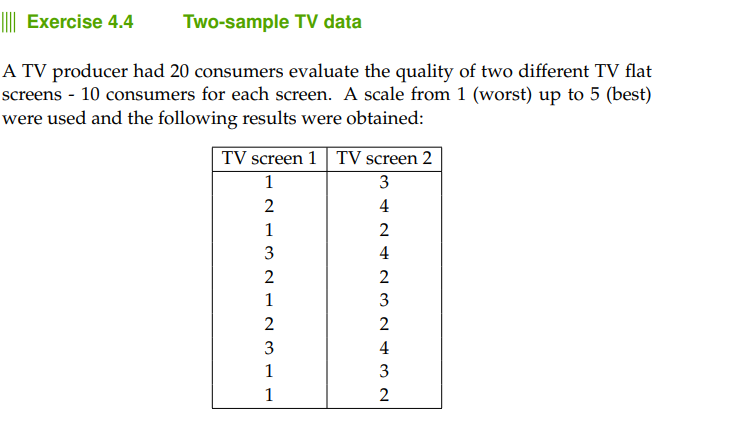

### **a)** Compare the two means without assuming any distribution for the two samples (non-parametric bootstrap confidence interval and relevant hypothesis test interpretation).
---

In [145]:
screen_1 = np.array([1,2,1,3,2,1,2,3,1,1])
screen_2 = np.array([3,4,2,4,2,3,2,4,3,2])
print(np.mean(screen_1))
print(np.mean(screen_2))

k = 10000
n1 = len(screen_1)
n2 = len(screen_2)


simsamples_screen_1 = np.random.choice(screen_1, (n1, k), replace=True)
simsamples_screen_2 = np.random.choice(screen_2, (n2, k), replace=True)

simmeandifs = np.mean(simsamples_screen_1, axis=0) - np.mean(simsamples_screen_2,
axis=0)


# Confidence interval
ci = np.quantile(simmeandifs, [0.025, 0.975])
print(ci)



1.7
2.9
[-1.9 -0.5]


We reject the null hypothesis of µ1 = µ2, since zero is not included in the CI of the
differences.


In [146]:
# OR:
x1 = np.array([1, 2, 1, 3, 2, 1, 2, 3, 1, 1])
x2 = np.array([3, 4, 2, 4, 2, 3, 2, 4, 3, 2])

## Number of simulated (bootstrapped) samples
k = 10000
n = len(x1) # same as len(x2)


## Simulated samples of TV1 and TV2 groups
simx1samples = np.random.choice(x1, (n, k), replace=True)
simx2samples = np.random.choice(x2, (n, k), replace=True)
simmeandifs = np.mean(simx1samples, axis=0) - np.mean(simx2samples,
axis=0)


# Confidence interval
ci = np.quantile(simmeandifs, [0.025, 0.975])
print(ci)

[-1.9 -0.5]


### **b)** Compare the two means assuming normal distributions for the two samples - without using simulations (or rather: assuming/hoping that the sample sizes are large enough to make the results approximately valid).
---

In [147]:
t_stat, p_val = stats.ttest_ind(x1, x2)
print(t_stat)

print(p_val)



-3.157408869505305
0.005449057981469947


We reject the null hypothesis of µ1 = µ2.

### **P-values:**
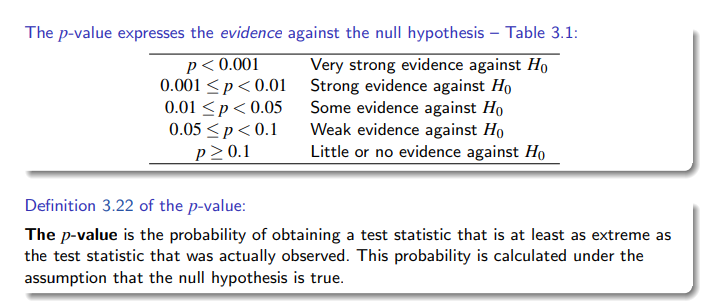

### **c)** Compare the two means assuming normal distributions for the two samples - simulation based (parametric bootstrap confidence interval and relevant hypothesis test interpretation – in spite of the obviously wrong assumption).
---

In [149]:
simx1samples = np.random.normal(np.mean(x1), np.std(x1,ddof=1), (n, k))
simx2samples = np.random.normal(np.mean(x2), np.std(x2,ddof=1), (n, k))
simmeandifs = np.mean(simx1samples, axis=0) - np.mean(simx2samples,
axis=0)
# Confidence interval
print(np.quantile(simmeandifs, [0.025, 0.975]))


[-1.93662758 -0.44499577]


We reject the null hypothesis of µ1 = µ2.

---

# **4.5 Non-linear error propagation**
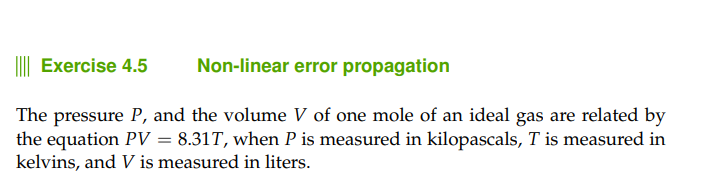

### **a)** Assume that P is measured to be 240.48 kPa and V to be 9.987 L with known measurement errors (given as standard deviations): 0.03 kPa and 0.002 L. Estimate T and find the uncertainty in the estimate
---

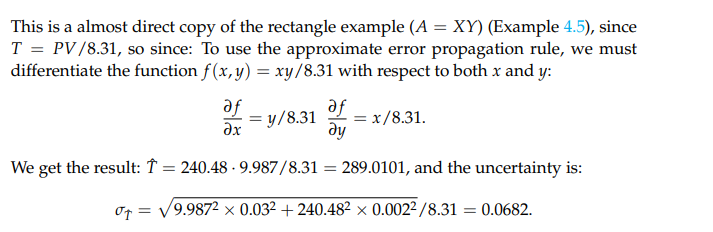

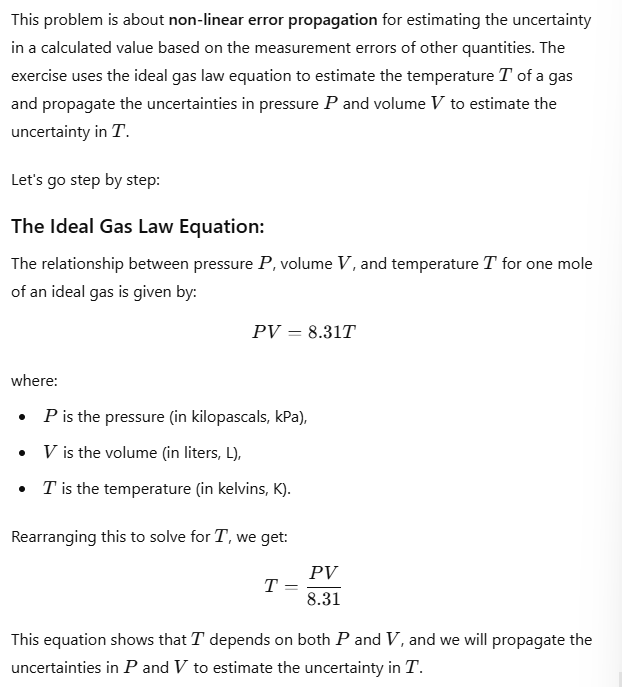
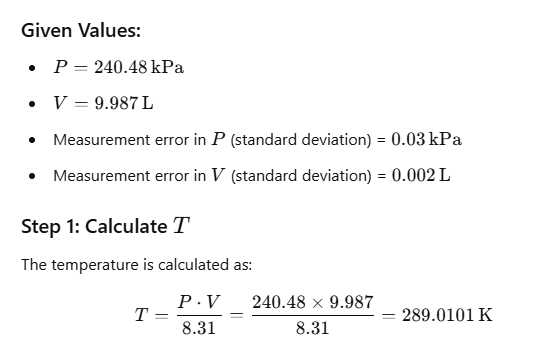
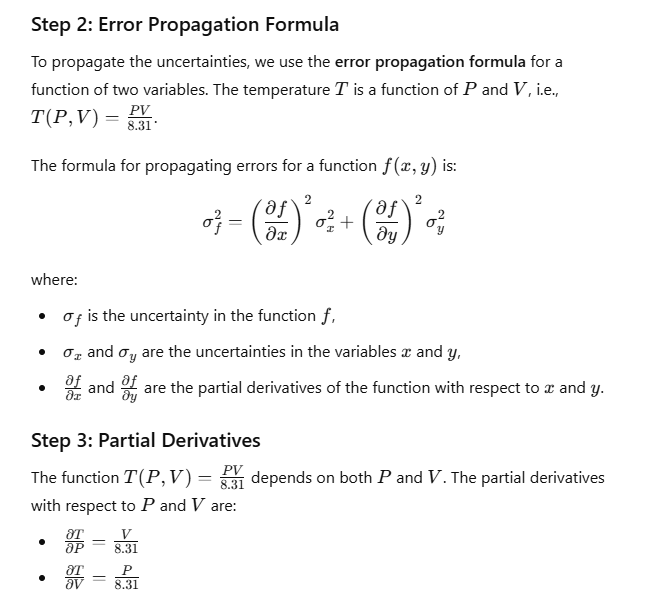
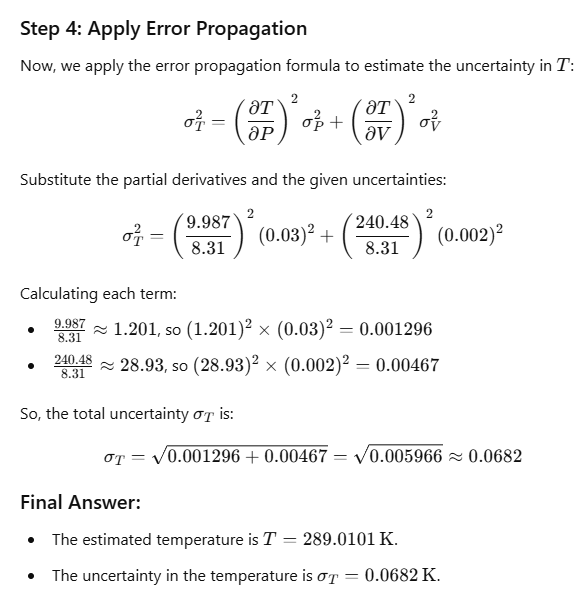


### **b)** Assume that P is measured to be 240.48kPa and T to be 289.12K with known measurement errors (given as standard deviations): 0.03kPa and 0.02K. Estimate V and find the uncertainty in the estimate.
---

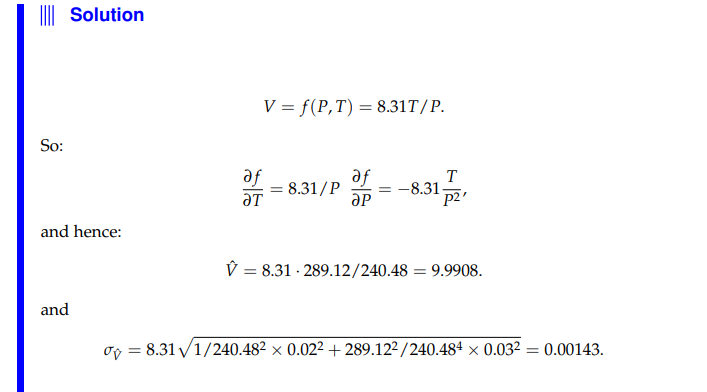

### **c)** Assume that V is measured to be 9.987 L and T to be 289.12 K with known measurement errors (given as standard deviations): 0.002 L and 0.02 K. Estimate P and find the uncertainty in the estimate.
---


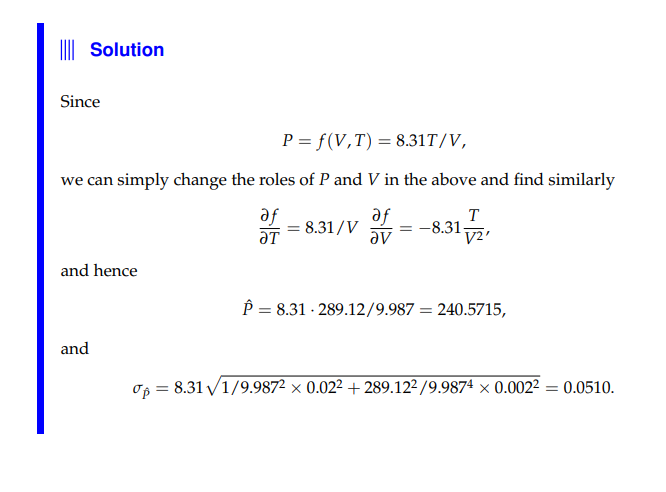

### **d)** Try to answer one or more of these questions by simulation (assume that the errors are normally distributed).
---

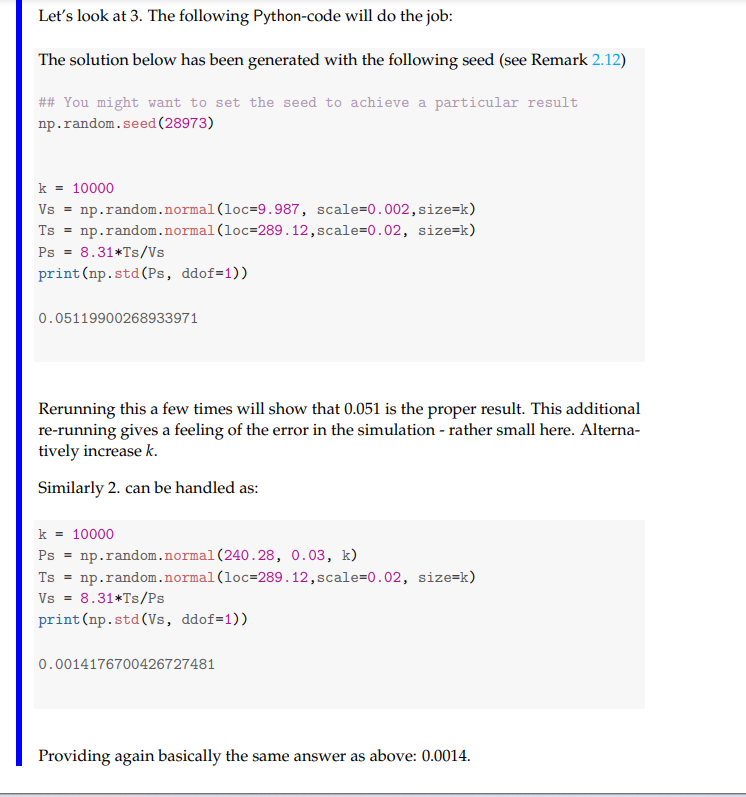